# Overfitting as demonstrated by polynomial regression


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('hls')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

### Create data
The data here is created as a linear function plus some noise.

In [2]:
# Make data
len_x = 40
noise_level = 10
true_model = np.arange(0, len_x)
y_noise = true_model + np.random.randn(len_x)*noise_level

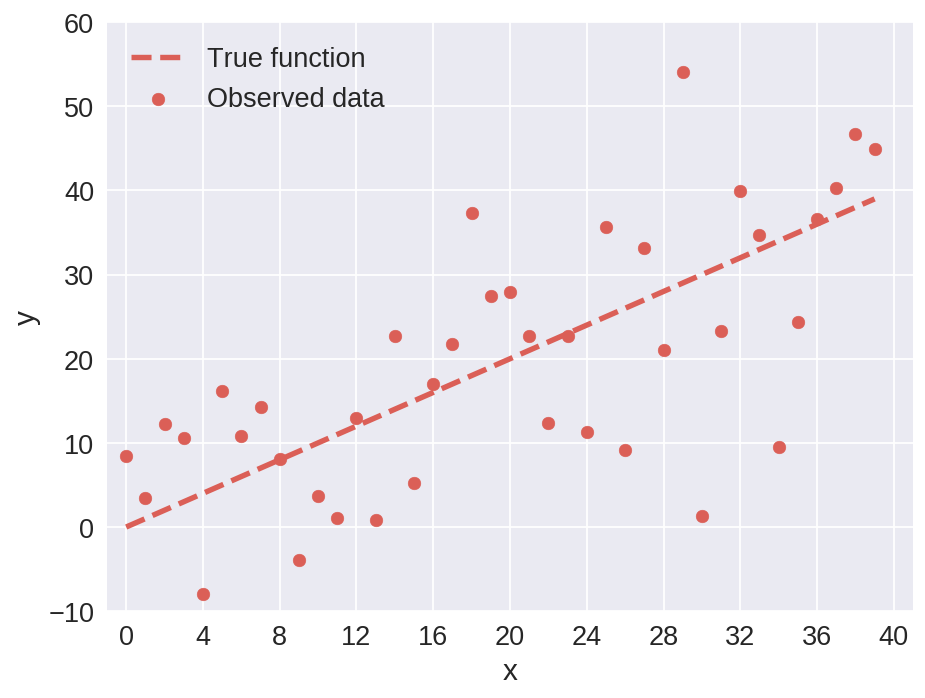

In [3]:
# Let's take a look
plt.figure(figsize=(8,6), dpi=130)
plt.scatter(np.arange(0, len_x), y_noise, label='Observed data')
plt.plot(true_model, linewidth=3, linestyle='--', label='True function')
plt.xlim(-1, len_x+1)
plt.ylim(-10, len_x+20)
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.linspace(0, len_x, 11, endpoint=True))
plt.legend(loc='upper left', frameon=False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.show()

### Fit always improves with an increasing number of predictors!
Here, we regress a set of an increasing number of polynomials onto a variable that is know to be created with a linear function. In the plots below, you see that, with an increasing number of polynomials, the model fit (expressed as r-squared) increases.

/home/lukas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/home/lukas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/home/lukas/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/lukas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


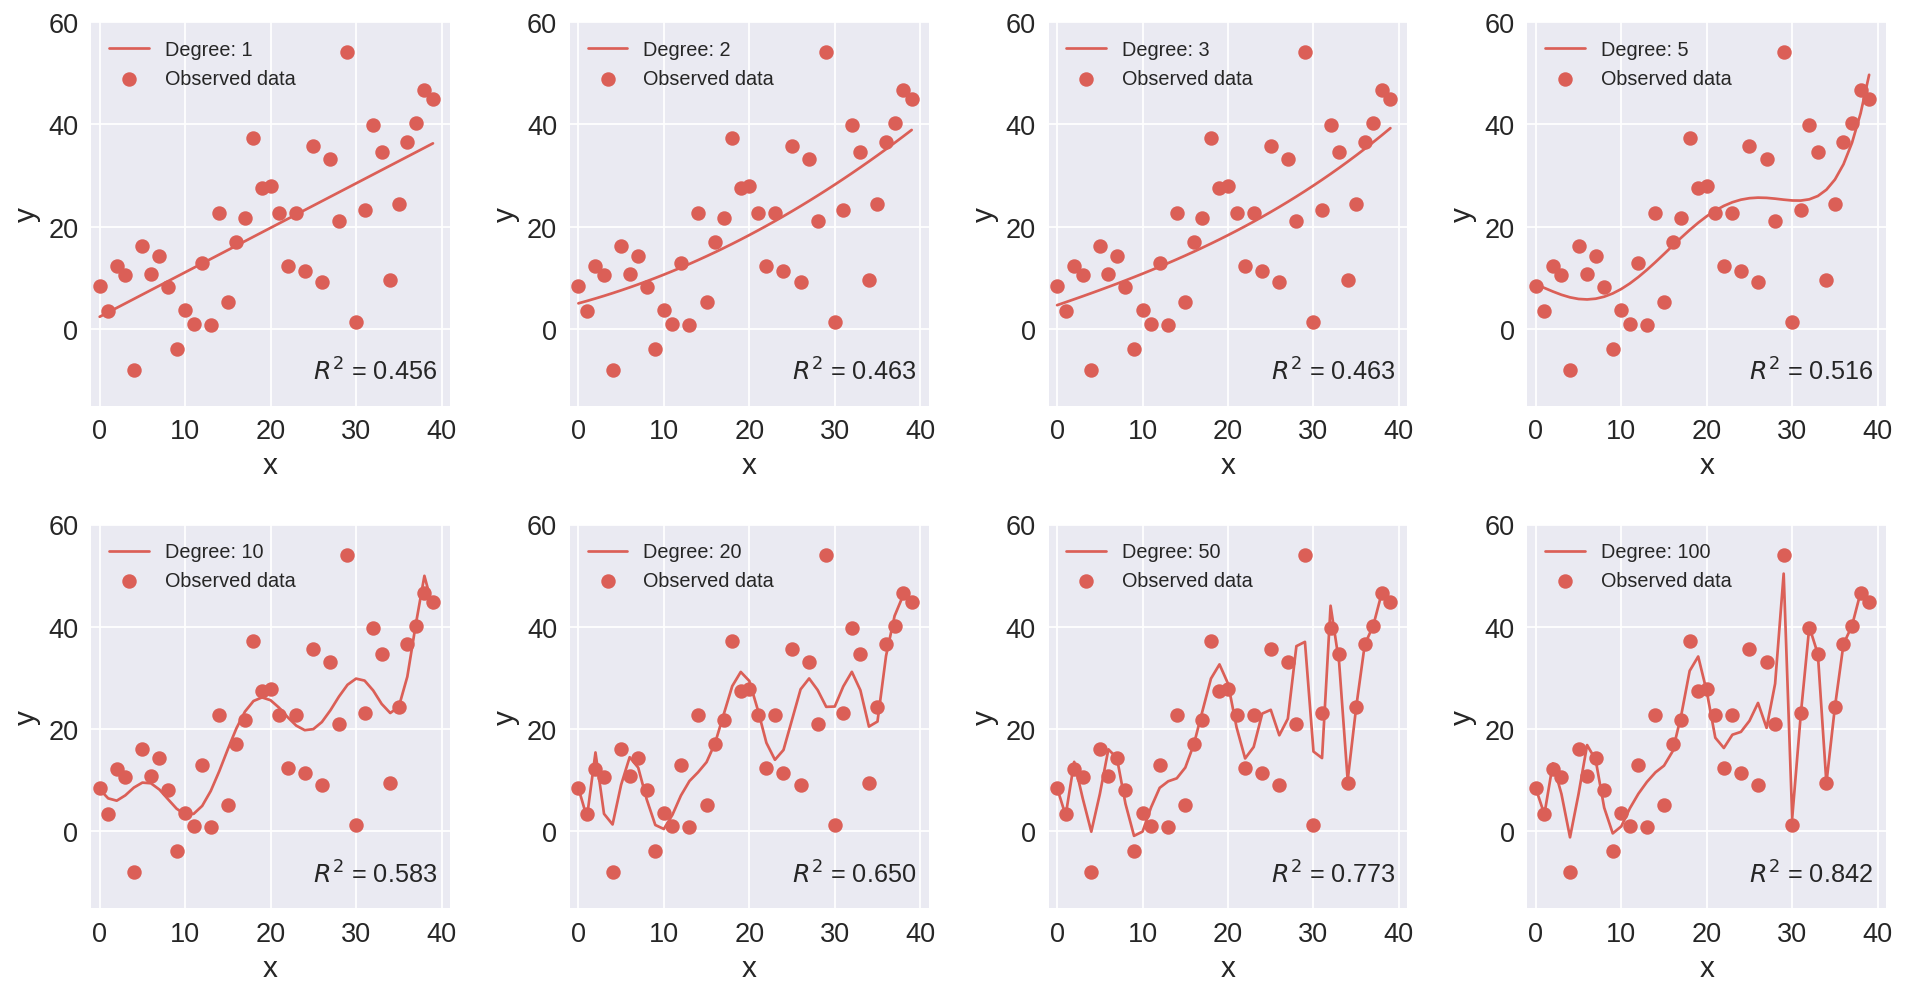

In [4]:
degrees = [1, 2, 3, 5, 10, 20, 50, 100]
plt.figure(figsize=(15,8), dpi=130)

for i, deg in enumerate(degrees):
    coef = np.polyfit(true_model, y_noise, deg)
    yhat = np.polyval(coef, true_model)

    plt.subplot(2, 4, i+1)

    plt.scatter(np.arange(0, len_x), y_noise, linewidth=1, label='Observed data')
    plt.plot(yhat, linewidth=1.5, linestyle='-', label='Degree: %i' % deg)
    plt.xlim(-1, len_x+1)
    plt.ylim(-15, len_x+20)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xticks(np.linspace(0,len_x, 5, endpoint=True))
    plt.legend(loc='upper left', frameon=False, prop={'size':11})

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    # Calculate R2
    ybar = np.mean(y_noise)
    R2 = np.sum((yhat-ybar)**2) / np.sum((y_noise - ybar)**2)
    
    plt.text(25, -10, '$R^2$ = %.3f' % R2, fontsize='14')
    plt.tight_layout()